In [23]:
import numpy as np
import scipy.stats as st
import pandas as pd

# Dataset
dataBASELINE = pd.read_csv("TotalNormal.csv", usecols=["correct_numbers"]).dropna().squeeze()
dataMEMORY = pd.read_csv("TotalMemoryPattern.csv", usecols=["correct_numbers"]).dropna().squeeze()
dataSPEED = pd.read_csv("TotalSpeed.csv", usecols=["correct_numbers"]).dropna().squeeze()
dataPAUSE = pd.read_csv("TotalPause.csv", usecols=["correct_numbers"]).dropna().squeeze()

dataBASELINE2 = pd.read_csv("TotalNormal.csv", usecols=["serial", "user_input"]).dropna().squeeze()
# print(dataBASELINE2)

# Calculate descriptive statistics for each condition
def calculate_stats(data, condition_name):
    n = len(data)
    mean_val = np.mean(data)
    q1 = np.percentile(data, 25)
    median = np.median(data)
    q3 = np.percentile(data, 75)
    
    # 95% Confidence Interval using t-distribution
    stderr = st.sem(data)
    ci_low, ci_high = st.t.interval(0.95, n-1, loc=mean_val, scale=stderr)
    
    return {
        'experiment_type': condition_name,
        'n': n,
        'mean_n_correct': round(mean_val, 2),
        'q1': q1,
        'median': median,
        'ci95_low': round(ci_low, 6),
        'ci95_high': round(ci_high, 6)
    }

# Calculate statistics for each condition
baseline_stats = calculate_stats(dataBASELINE, 'Baseline')
memory_stats = calculate_stats(dataMEMORY, 'Memory')
speed_stats = calculate_stats(dataSPEED, 'Speed-up')
pause_stats = calculate_stats(dataPAUSE, 'Pause')

# Create summary DataFrame
summary_data = [baseline_stats, memory_stats, speed_stats, pause_stats]
summary_df = pd.DataFrame(summary_data)

print("Summary (per condition):")
print(summary_df.to_string(index=False))

# Combined data analysis
combined_data = pd.concat([dataBASELINE, dataMEMORY, dataSPEED, dataPAUSE], ignore_index=True)
combined_stats = calculate_stats(combined_data, 'Combined')

print(f"\nCombined Analysis:")
print(f"Overall mean: {combined_stats['mean_n_correct']}")
print(f"95% CI: [{combined_stats['ci95_low']:.6f}, {combined_stats['ci95_high']:.6f}]")

Summary (per condition):
experiment_type  n  mean_n_correct  q1  median  ci95_low  ci95_high
       Baseline 35            4.14 3.0     4.0  3.558810   4.726904
         Memory 30            3.73 3.0     4.0  3.090801   4.375865
       Speed-up 60            4.60 4.0     4.0  4.213020   4.986980
          Pause 30            3.50 3.0     3.0  3.022109   3.977891

Combined Analysis:
Overall mean: 4.12
95% CI: [3.862355, 4.369903]


In [24]:
# Analysis for each speed

import numpy as np
import pandas as pd
import scipy.stats as st

# Load the data (using different variable name to avoid conflict)
dataSPEED_detailed = pd.read_csv("TotalSpeed.csv", usecols=["speed_ms", "correct_numbers"]).dropna()

# Function to calculate mean and 95% CI for a given subset
def calculate_mean_ci(data):
    n = len(data)
    mean_val = np.mean(data)
    stderr = st.sem(data)
    ci_low, ci_high = st.t.interval(0.95, n-1, loc=mean_val, scale=stderr)
    return pd.Series({
        'n': n,
        'mean_correct_numbers': round(mean_val, 3),
        'ci95_low': round(ci_low, 6),
        'ci95_high': round(ci_high, 6)
    })

# Group by speed and apply the statistics
speed_summary = dataSPEED_detailed.groupby("speed_ms")["correct_numbers"].apply(calculate_mean_ci).reset_index()

# Print nicely formatted results
print("Per-speed analysis (mean + 95% CI):")
print(speed_summary.to_string(index=False))

Per-speed analysis (mean + 95% CI):
 speed_ms              level_1  correct_numbers
      500                    n        20.000000
      500 mean_correct_numbers         3.950000
      500             ci95_low         3.392607
      500            ci95_high         4.507393
     1000                    n        20.000000
     1000 mean_correct_numbers         5.200000
     1000             ci95_low         4.431724
     1000            ci95_high         5.968276
     1500                    n        20.000000
     1500 mean_correct_numbers         4.650000
     1500             ci95_low         3.983355
     1500            ci95_high         5.316645


In [25]:
# Load the corrected binary indicators from fixed CSV files
import pandas as pd
import numpy as np

# Load binary indicators: 1 = user included first/last number, 0 = did not include
first_baseline = pd.read_csv("TotalNormal.csv", usecols=["first_correct"]).squeeze("columns").astype(int)
last_baseline = pd.read_csv("TotalNormal.csv", usecols=["last_correct"]).squeeze("columns").astype(int)
first_memory = pd.read_csv("TotalMemoryPattern.csv", usecols=["first_correct"]).squeeze("columns").astype(int)
last_memory = pd.read_csv("TotalMemoryPattern.csv", usecols=["last_correct"]).squeeze("columns").astype(int)
first_speed = pd.read_csv("TotalSpeed.csv", usecols=["first_correct"]).squeeze("columns").astype(int)
last_speed = pd.read_csv("TotalSpeed.csv", usecols=["last_correct"]).squeeze("columns").astype(int)
first_pause = pd.read_csv("TotalPause.csv", usecols=["first_correct"]).squeeze("columns").astype(int)
last_pause = pd.read_csv("TotalPause.csv", usecols=["last_correct"]).squeeze("columns").astype(int)

print("Loaded corrected binary indicators:")
print(f"Baseline: {len(first_baseline)} attempts")
print(f"Memory: {len(first_memory)} attempts") 
print(f"Speed: {len(first_speed)} attempts")
print(f"Pause: {len(first_pause)} attempts")
print()
print("These now represent:")
print("1 = User correctly included the first/last number from the sequence")
print("0 = User did NOT include the first/last number")

Loaded corrected binary indicators:
Baseline: 35 attempts
Memory: 30 attempts
Speed: 60 attempts
Pause: 30 attempts

These now represent:
1 = User correctly included the first/last number from the sequence
0 = User did NOT include the first/last number


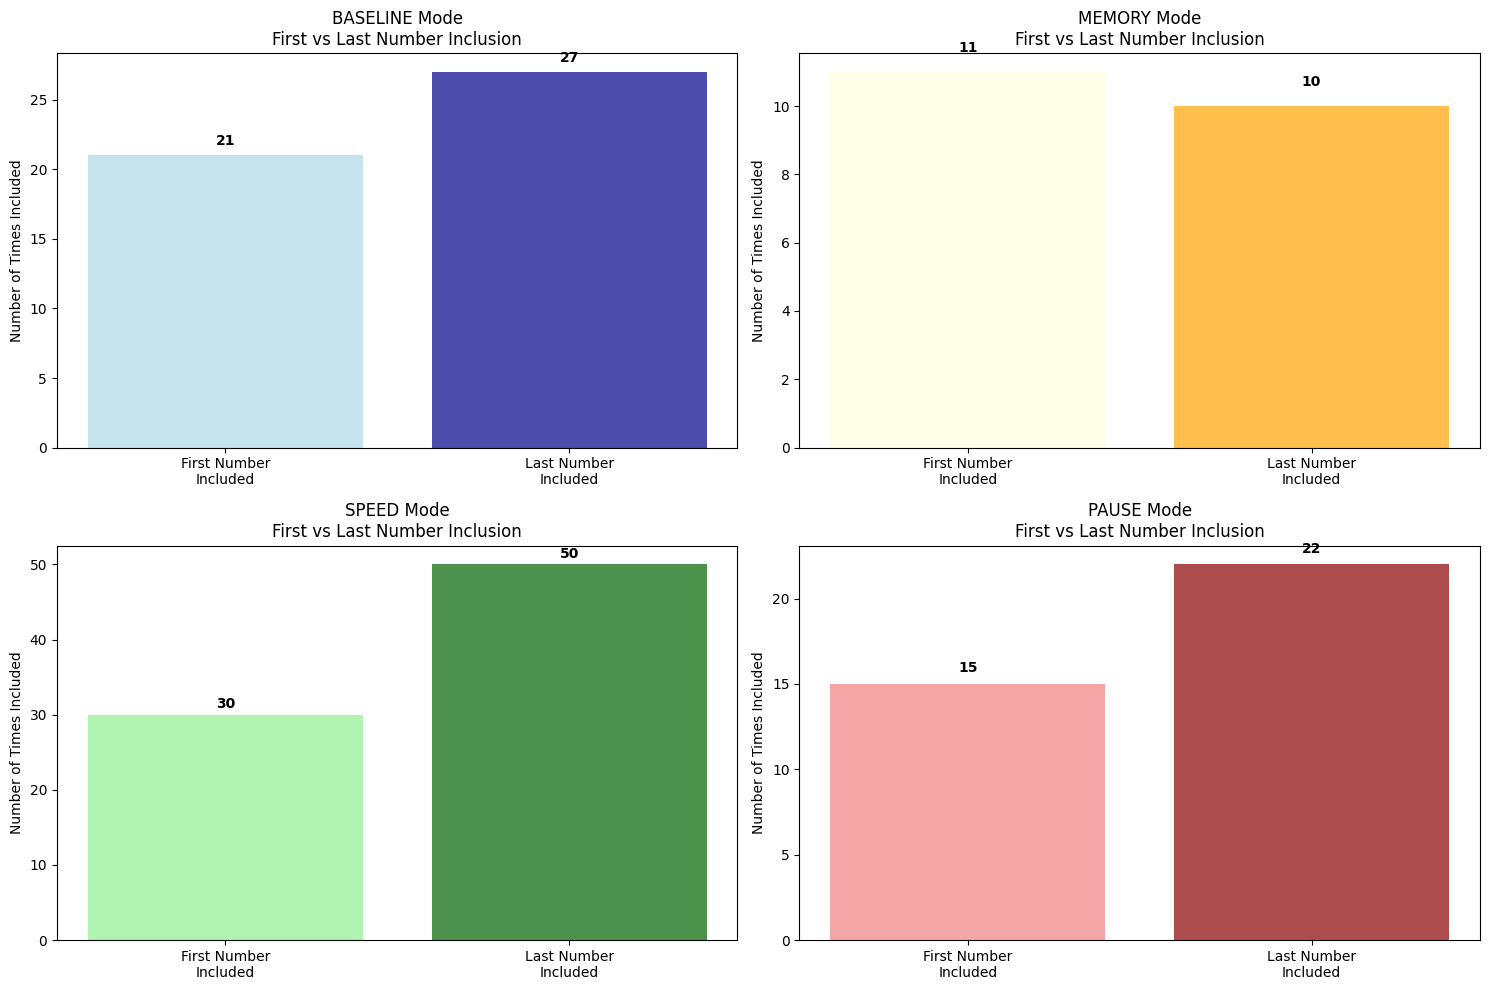

FIRST vs LAST NUMBER INCLUSION COUNTS:
----------------------------------------
BASELINE:  First included: 21/35, Last included: 27/35
MEMORY:  First included: 11/30, Last included: 10/30
SPEED:   First included: 30/60, Last included: 50/60
PAUSE:   First included: 15/30, Last included: 22/30

SUCCESS RATES:
BASELINE:  First: 60.0%, Last: 77.1%
MEMORY:  First: 36.7%, Last: 33.3%
SPEED:   First: 50.0%, Last: 83.3%
PAUSE:   First: 50.0%, Last: 73.3%


In [26]:
# ANALYSIS: First vs Last Number Inclusion by Game Mode
import matplotlib.pyplot as plt
import numpy as np

# Count how many times users correctly included first/last numbers
first_baseline_count = first_baseline.sum()  # Times first number was correctly included
last_baseline_count = last_baseline.sum()    # Times last number was correctly included

first_memory_count = first_memory.sum()  # Times first number was correctly included
last_memory_count = last_memory.sum()    # Times last number was correctly included

first_speed_count = first_speed.sum()    # Times first number was correctly included
last_speed_count = last_speed.sum()      # Times last number was correctly included

first_pause_count = first_pause.sum()    # Times first number was correctly included
last_pause_count = last_pause.sum()      # Times last number was correctly included

# Create comparison bar chart
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# BASELINE comparison
categories = ['First Number\nIncluded', 'Last Number\nIncluded']
baseline_counts = [first_baseline_count, last_baseline_count]
ax1.bar(categories, baseline_counts, color=['lightblue', 'darkblue'], alpha=0.7)
ax1.set_title('BASELINE Mode\nFirst vs Last Number Inclusion')
ax1.set_ylabel('Number of Times Included')
for i, v in enumerate(baseline_counts):
    ax1.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# MEMORY comparison  
memory_counts = [first_memory_count, last_memory_count]
ax2.bar(categories, memory_counts, color=['lightyellow', 'orange'], alpha=0.7)
ax2.set_title('MEMORY Mode\nFirst vs Last Number Inclusion')
ax2.set_ylabel('Number of Times Included')
for i, v in enumerate(memory_counts):
    ax2.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# SPEED comparison
speed_counts = [first_speed_count, last_speed_count]
ax3.bar(categories, speed_counts, color=['lightgreen', 'darkgreen'], alpha=0.7)
ax3.set_title('SPEED Mode\nFirst vs Last Number Inclusion')
ax3.set_ylabel('Number of Times Included')
for i, v in enumerate(speed_counts):
    ax3.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# PAUSE comparison
pause_counts = [first_pause_count, last_pause_count]
ax4.bar(categories, pause_counts, color=['lightcoral', 'darkred'], alpha=0.7)
ax4.set_title('PAUSE Mode\nFirst vs Last Number Inclusion')
ax4.set_ylabel('Number of Times Included')
for i, v in enumerate(pause_counts):
    ax4.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print("FIRST vs LAST NUMBER INCLUSION COUNTS:")
print("-" * 40)
print(f"BASELINE:  First included: {first_baseline_count}/{len(first_baseline)}, Last included: {last_baseline_count}/{len(last_baseline)}")
print(f"MEMORY:  First included: {first_memory_count}/{len(first_memory)}, Last included: {last_memory_count}/{len(last_memory)}")  
print(f"SPEED:   First included: {first_speed_count}/{len(first_speed)}, Last included: {last_speed_count}/{len(last_speed)}")
print(f"PAUSE:   First included: {first_pause_count}/{len(first_pause)}, Last included: {last_pause_count}/{len(last_pause)}")

# Calculate success rates
print(f"\nSUCCESS RATES:")
print(f"BASELINE:  First: {(first_baseline_count/len(first_baseline)*100):.1f}%, Last: {(last_baseline_count/len(last_baseline)*100):.1f}%")
print(f"MEMORY:  First: {(first_memory_count/len(first_memory)*100):.1f}%, Last: {(last_memory_count/len(last_memory)*100):.1f}%")
print(f"SPEED:   First: {(first_speed_count/len(first_speed)*100):.1f}%, Last: {(last_speed_count/len(last_speed)*100):.1f}%")
print(f"PAUSE:   First: {(first_pause_count/len(first_pause)*100):.1f}%, Last: {(last_pause_count/len(last_pause)*100):.1f}%")

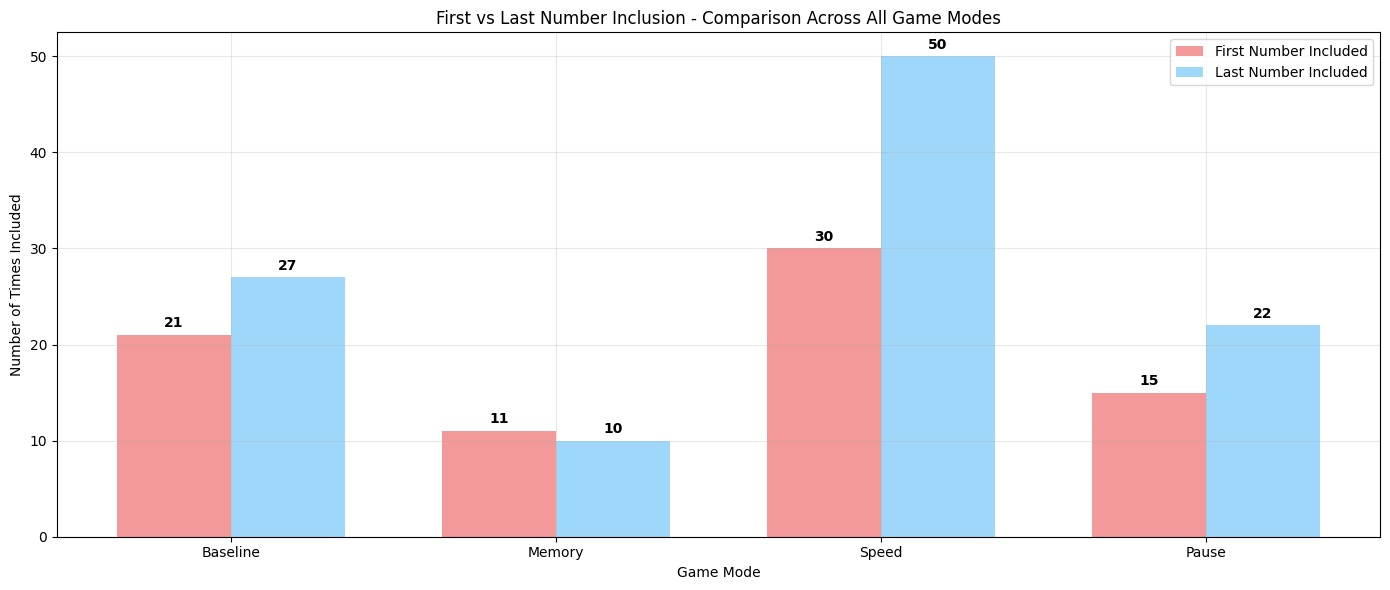


INCLUSION ANALYSIS:
----------------------------------------
Baseline:
  First number included: 21/35 (60.0%)
  Last number included:  27/35 (77.1%)

Memory:
  First number included: 11/30 (36.7%)
  Last number included:  10/30 (33.3%)

Speed:
  First number included: 30/60 (50.0%)
  Last number included:  50/60 (83.3%)

Pause:
  First number included: 15/30 (50.0%)
  Last number included:  22/30 (73.3%)



In [27]:
# OVERALL COMPARISON: All game modes side by side
fig, ax = plt.subplots(figsize=(14, 6))

# Data for grouped bar chart
game_modes = ['Baseline', 'Memory', 'Speed', 'Pause']
first_included = [first_baseline_count, first_memory_count, first_speed_count, first_pause_count]
last_included = [last_baseline_count, last_memory_count, last_speed_count, last_pause_count]

x = np.arange(len(game_modes))
width = 0.35

# Create grouped bars
bars1 = ax.bar(x - width/2, first_included, width, label='First Number Included', 
               color='lightcoral', alpha=0.8)
bars2 = ax.bar(x + width/2, last_included, width, label='Last Number Included', 
               color='lightskyblue', alpha=0.8)

# Add labels and formatting
ax.set_xlabel('Game Mode')
ax.set_ylabel('Number of Times Included')
ax.set_title('First vs Last Number Inclusion - Comparison Across All Game Modes')
ax.set_xticks(x)
ax.set_xticklabels(game_modes)
ax.legend()
ax.grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
               f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate percentages
print("\nINCLUSION ANALYSIS:")
print("-" * 40)
for i, mode in enumerate(game_modes):
    total_attempts = [len(first_baseline), len(first_memory), len(first_speed), len(first_pause)][i]
    first_pct = (first_included[i] / total_attempts) * 100
    last_pct = (last_included[i] / total_attempts) * 100
    print(f"{mode}:")
    print(f"  First number included: {first_included[i]}/{total_attempts} ({first_pct:.1f}%)")
    print(f"  Last number included:  {last_included[i]}/{total_attempts} ({last_pct:.1f}%)")
    print()

In [28]:
# DETAILED BREAKDOWN: Individual game mode analysis
print("DETAILED INCLUSION BREAKDOWN BY GAME MODE:")
print("=" * 50)

# Function to analyze a game mode
def analyze_mode(first_data, last_data, mode_name):
    total_attempts = len(first_data)
    first_included_count = first_data.sum()
    last_included_count = last_data.sum()
    
    print(f"\n{mode_name} Mode:")
    print(f"  Total attempts: {total_attempts}")
    print(f"  First number included: {first_included_count} times ({(first_included_count/total_attempts)*100:.1f}%)")
    print(f"  Last number included: {last_included_count} times ({(last_included_count/total_attempts)*100:.1f}%)")
    
    if first_included_count > last_included_count:
        diff = first_included_count - last_included_count
        print(f"  → First number inclusion is HIGHER (+{diff} more inclusions)")
    elif last_included_count > first_included_count:
        diff = last_included_count - first_included_count
        print(f"  → Last number inclusion is HIGHER (+{diff} more inclusions)")
    else:
        print(f"  → First and last inclusion rates are equal")

# Analyze each mode
analyze_mode(first_baseline, last_baseline, "BASELINE")
analyze_mode(first_memory, last_memory, "MEMORY") 
analyze_mode(first_speed, last_speed, "SPEED")
analyze_mode(first_pause, last_pause, "PAUSE")

print(f"\nKEY INSIGHTS:")
print("-" * 20)
total_first = first_baseline_count + first_memory_count + first_speed_count + first_pause_count
total_last = last_baseline_count + last_memory_count + last_speed_count + last_pause_count
print(f"Overall: {total_first} first number inclusions vs {total_last} last number inclusions")

DETAILED INCLUSION BREAKDOWN BY GAME MODE:

BASELINE Mode:
  Total attempts: 35
  First number included: 21 times (60.0%)
  Last number included: 27 times (77.1%)
  → Last number inclusion is HIGHER (+6 more inclusions)

MEMORY Mode:
  Total attempts: 30
  First number included: 11 times (36.7%)
  Last number included: 10 times (33.3%)
  → First number inclusion is HIGHER (+1 more inclusions)

SPEED Mode:
  Total attempts: 60
  First number included: 30 times (50.0%)
  Last number included: 50 times (83.3%)
  → Last number inclusion is HIGHER (+20 more inclusions)

PAUSE Mode:
  Total attempts: 30
  First number included: 15 times (50.0%)
  Last number included: 22 times (73.3%)
  → Last number inclusion is HIGHER (+7 more inclusions)

KEY INSIGHTS:
--------------------
Overall: 77 first number inclusions vs 109 last number inclusions


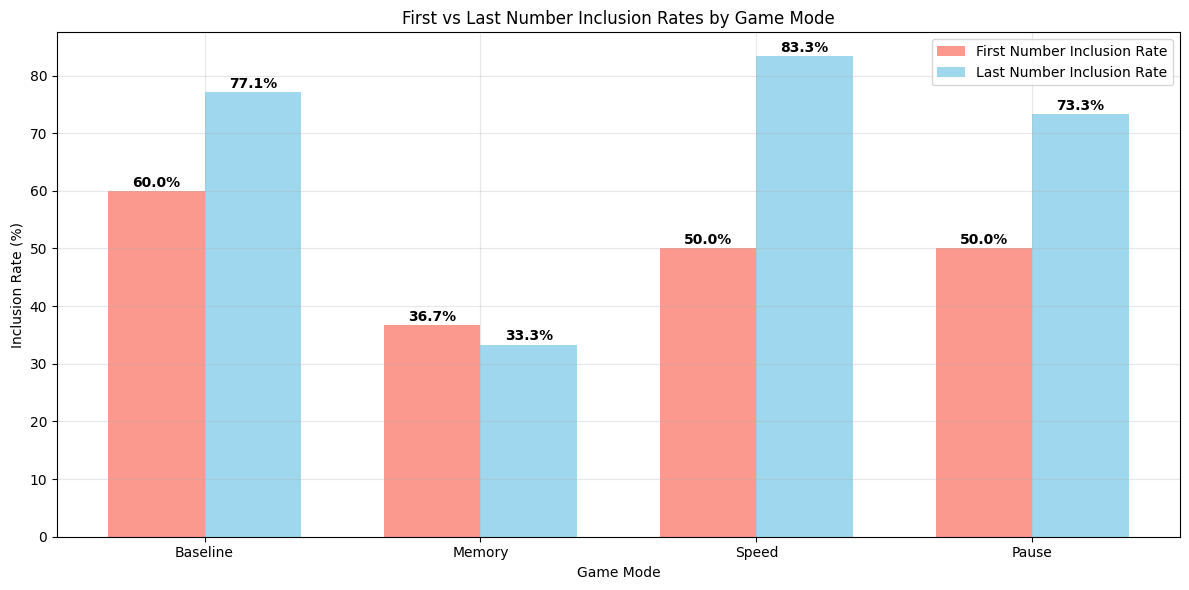

This shows the INCLUSION RATES (percentages) rather than raw counts


In [29]:
# PERCENTAGE COMPARISON CHART
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate inclusion rates as percentages
game_modes = ['Baseline', 'Memory', 'Speed', 'Pause']
total_attempts = [len(first_baseline), len(first_memory), len(first_speed), len(first_pause)]
first_inclusion_rates = [(first_baseline_count/len(first_baseline))*100, 
                         (first_memory_count/len(first_memory))*100,
                         (first_speed_count/len(first_speed))*100,
                         (first_pause_count/len(first_pause))*100]
last_inclusion_rates = [(last_baseline_count/len(last_baseline))*100,
                        (last_memory_count/len(last_memory))*100, 
                        (last_speed_count/len(last_speed))*100,
                        (last_pause_count/len(last_pause))*100]

x = np.arange(len(game_modes))
width = 0.35

# Create percentage bars
bars1 = ax.bar(x - width/2, first_inclusion_rates, width, label='First Number Inclusion Rate', 
               color='salmon', alpha=0.8)
bars2 = ax.bar(x + width/2, last_inclusion_rates, width, label='Last Number Inclusion Rate', 
               color='skyblue', alpha=0.8)

ax.set_xlabel('Game Mode')
ax.set_ylabel('Inclusion Rate (%)')
ax.set_title('First vs Last Number Inclusion Rates by Game Mode')
ax.set_xticks(x)
ax.set_xticklabels(game_modes)
ax.legend()
ax.grid(True, alpha=0.3)

# Add percentage labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.2,
               f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("This shows the INCLUSION RATES (percentages) rather than raw counts")

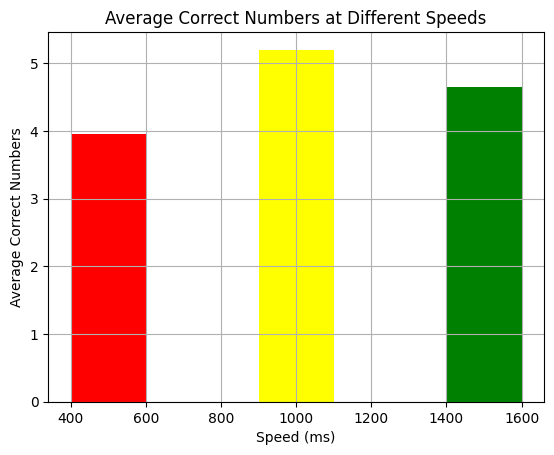

SPEED ANALYSIS - Correct Numbers Performance:
At 500ms:  3.95 average correct numbers (20 attempts)
At 1000ms: 5.20 average correct numbers (20 attempts)
At 1500ms: 4.65 average correct numbers (20 attempts)

Best performance: 1000ms
Worst performance: 500ms


In [30]:
# Graph over correct numbers achieved per speed
import matplotlib.pyplot as plt
data = pd.read_csv("TotalSpeed.csv", usecols=["speed_ms", "correct_numbers"]).dropna()

# Correct numbers achieved at each speed
correct_500ms = data[data['speed_ms'] == 500]['correct_numbers']
correct_1000ms = data[data['speed_ms'] == 1000]['correct_numbers']
correct_1500ms = data[data['speed_ms'] == 1500]['correct_numbers']

# Calculate averages for each speed
avg_500 = data[data['speed_ms'] == 500]['correct_numbers'].mean()
avg_1000 = data[data['speed_ms'] == 1000]['correct_numbers'].mean()
avg_1500 = data[data['speed_ms'] == 1500]['correct_numbers'].mean()

# Graphing the data: X axis is speed, Y axis is average correct numbers
plt.bar([500, 1000, 1500], [avg_500, avg_1000, avg_1500],
        color=['red', 'yellow', 'green'], width=200)
plt.xlabel('Speed (ms)')
plt.ylabel('Average Correct Numbers')
plt.title('Average Correct Numbers at Different Speeds')
plt.grid()
plt.show()

# Print detailed statistics for each speed
print("SPEED ANALYSIS - Correct Numbers Performance:")
print("=" * 50)
print(f"At 500ms:  {avg_500:.2f} average correct numbers ({len(correct_500ms)} attempts)")
print(f"At 1000ms: {avg_1000:.2f} average correct numbers ({len(correct_1000ms)} attempts)")
print(f"At 1500ms: {avg_1500:.2f} average correct numbers ({len(correct_1500ms)} attempts)")

print(f"\nBest performance: {1500 if avg_1500 >= max(avg_500, avg_1000) else (1000 if avg_1000 >= avg_500 else 500)}ms")
print(f"Worst performance: {500 if avg_500 <= min(avg_1000, avg_1500) else (1000 if avg_1000 <= avg_1500 else 1500)}ms")

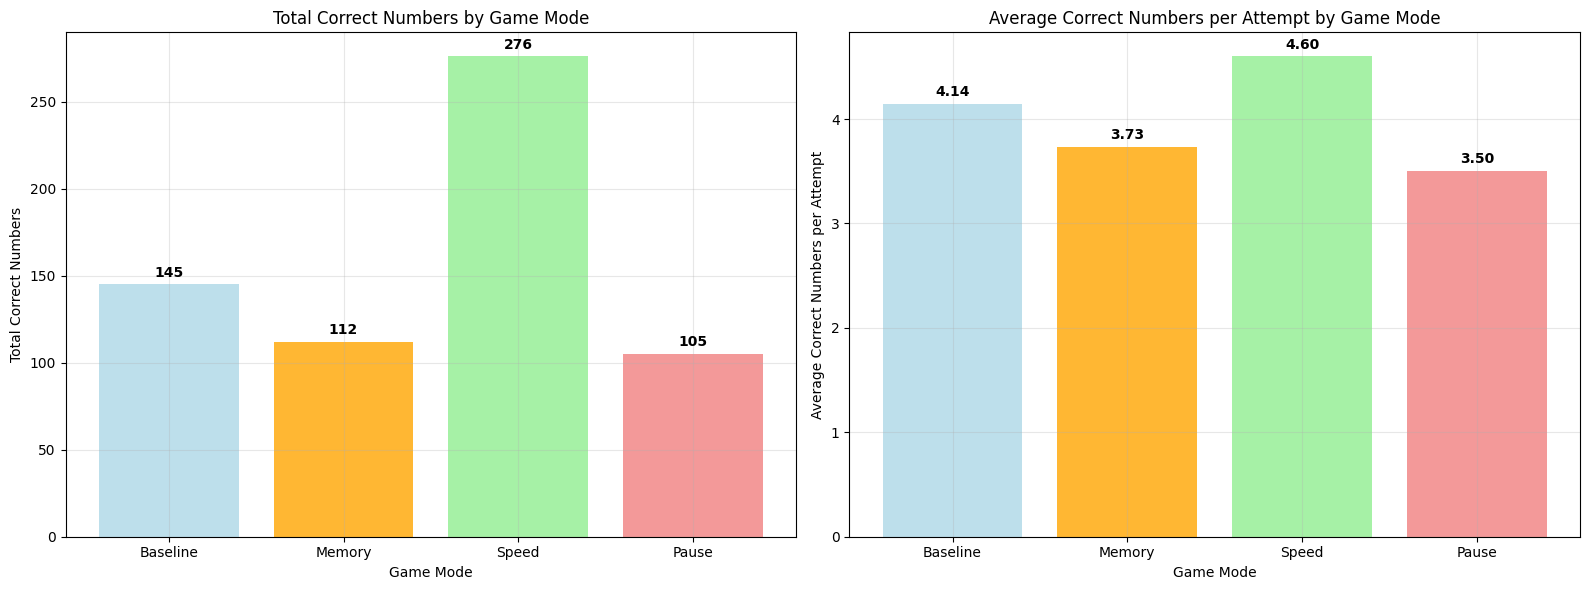

CORRECT NUMBERS PERFORMANCE COMPARISON:
BASELINE:  145 total correct, 4.14 avg per attempt (35 attempts)
MEMORY:  112 total correct, 3.73 avg per attempt (30 attempts)
SPEED:   276 total correct, 4.60 avg per attempt (60 attempts)
PAUSE:   105 total correct, 3.50 avg per attempt (30 attempts)

KEY INSIGHTS:
--------------------
Best total performance: Speed (276 correct numbers)
Worst total performance: Pause (105 correct numbers)
Highest average per attempt: Speed (4.60 correct/attempt)
Lowest average per attempt: Pause (3.50 correct/attempt)


In [31]:
# CORRECT NUMBERS COMPARISON - Analyzing performance across game modes
import matplotlib.pyplot as plt
import numpy as np

# Calculate total correct numbers for each game mode (these are the sums from the correct_numbers column)
total_correct_baseline = dataBASELINE.sum()    # Sum of all correct numbers in baseline mode
total_correct_memory = dataMEMORY.sum()   # Sum of all correct numbers in memory mode  
total_correct_speed = dataSPEED.sum()      # Sum of all correct numbers in speed mode
total_correct_pause = dataPAUSE.sum()      # Sum of all correct numbers in pause mode

# Calculate average correct numbers per attempt
avg_correct_baseline = dataBASELINE.mean()
avg_correct_memory = dataMEMORY.mean() 
avg_correct_speed = dataSPEED.mean()
avg_correct_pause = dataPAUSE.mean()

# Create comparison charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Total Correct Numbers Count
game_modes = ['Baseline', 'Memory', 'Speed', 'Pause']
total_correct = [total_correct_baseline, total_correct_memory, total_correct_speed, total_correct_pause]
colors = ['lightblue', 'orange', 'lightgreen', 'lightcoral']

bars1 = ax1.bar(game_modes, total_correct, color=colors, alpha=0.8)
ax1.set_title('Total Correct Numbers by Game Mode')
ax1.set_ylabel('Total Correct Numbers')
ax1.set_xlabel('Game Mode')
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, total) in enumerate(zip(bars1, total_correct)):
    ax1.text(bar.get_x() + bar.get_width()/2., total + max(total_correct) * 0.01,
            f'{int(total)}', ha='center', va='bottom', fontweight='bold')

# Chart 2: Average Correct Numbers per Attempt
avg_correct = [avg_correct_baseline, avg_correct_memory, avg_correct_speed, avg_correct_pause]

bars2 = ax2.bar(game_modes, avg_correct, color=colors, alpha=0.8)
ax2.set_title('Average Correct Numbers per Attempt by Game Mode')
ax2.set_ylabel('Average Correct Numbers per Attempt')
ax2.set_xlabel('Game Mode') 
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, avg) in enumerate(zip(bars2, avg_correct)):
    ax2.text(bar.get_x() + bar.get_width()/2., avg + max(avg_correct) * 0.01,
            f'{avg:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed summary
print("CORRECT NUMBERS PERFORMANCE COMPARISON:")
print("=" * 50)
print(f"BASELINE:  {total_correct_baseline} total correct, {avg_correct_baseline:.2f} avg per attempt ({len(dataBASELINE)} attempts)")
print(f"MEMORY:  {total_correct_memory} total correct, {avg_correct_memory:.2f} avg per attempt ({len(dataMEMORY)} attempts)")
print(f"SPEED:   {total_correct_speed} total correct, {avg_correct_speed:.2f} avg per attempt ({len(dataSPEED)} attempts)")
print(f"PAUSE:   {total_correct_pause} total correct, {avg_correct_pause:.2f} avg per attempt ({len(dataPAUSE)} attempts)")

# Find which mode has best/worst performance
max_total = max(total_correct)
min_total = min(total_correct)
max_mode = game_modes[total_correct.index(max_total)]
min_mode = game_modes[total_correct.index(min_total)]

max_avg = max(avg_correct)
min_avg = min(avg_correct)
max_avg_mode = game_modes[avg_correct.index(max_avg)]
min_avg_mode = game_modes[avg_correct.index(min_avg)]

print(f"\nKEY INSIGHTS:")
print("-" * 20)
print(f"Best total performance: {max_mode} ({int(max_total)} correct numbers)")
print(f"Worst total performance: {min_mode} ({int(min_total)} correct numbers)")
print(f"Highest average per attempt: {max_avg_mode} ({max_avg:.2f} correct/attempt)")
print(f"Lowest average per attempt: {min_avg_mode} ({min_avg:.2f} correct/attempt)")

PAUSE MODE DETAILED ANALYSIS:
Total attempts: 30
Average correct per attempt: 3.50
Average wrong per attempt: 6.50
Total numbers per sequence: 10.0
Accuracy rate: 35.0%


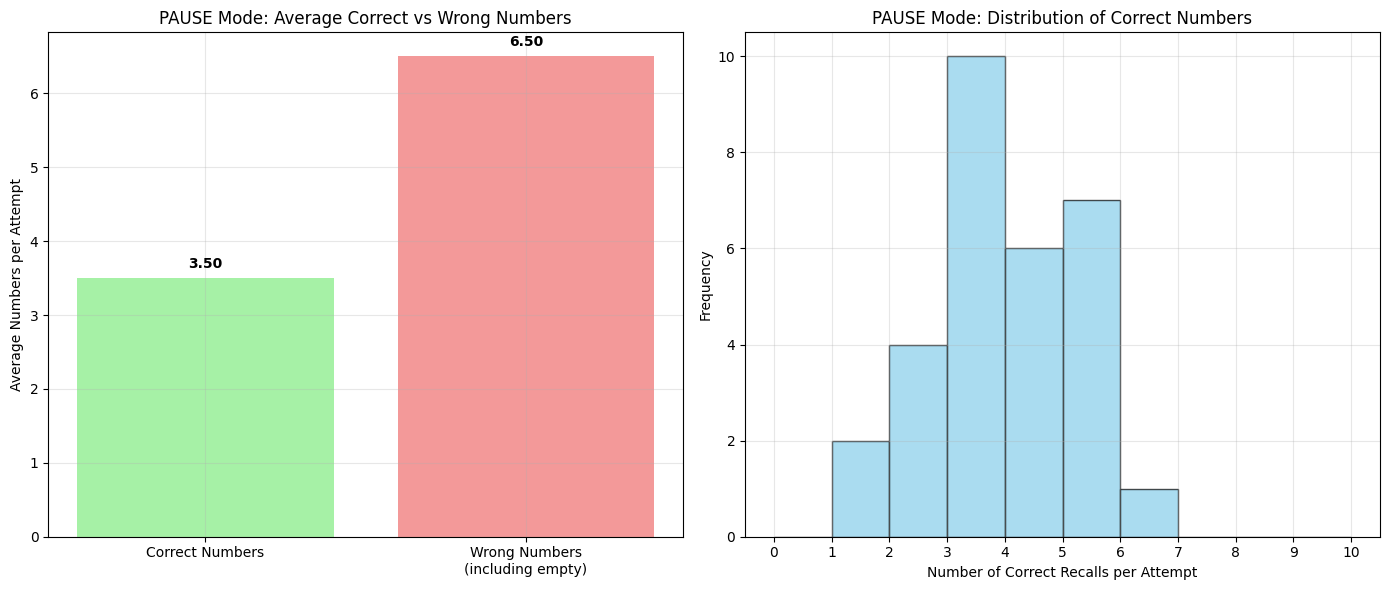


PERFORMANCE COMPARISON:
------------------------------
Baseline avg: 4.14
Memory avg:   3.73
Speed avg:    4.60
Pause avg:    3.50

RANKING (best to worst):
1. Speed: 4.60 correct per attempt
2. Baseline: 4.14 correct per attempt
3. Memory: 3.73 correct per attempt
4. Pause: 3.50 correct per attempt


In [32]:
# PAUSE MODE SPECIFIC ANALYSIS - Correct vs Wrong Numbers
import matplotlib.pyplot as plt
import pandas as pd

# Load pause mode data with both correct and wrong numbers
pause_data = pd.read_csv("totalPause.csv", usecols=["correct_numbers", "wrong_numbers"]).dropna()

# Calculate statistics
total_attempts = len(pause_data)
avg_correct = pause_data["correct_numbers"].mean()
avg_wrong = pause_data["wrong_numbers"].mean()
total_numbers_per_trial = avg_correct + avg_wrong  # Should be around 10 for your sequences

print("PAUSE MODE DETAILED ANALYSIS:")
print("=" * 40)
print(f"Total attempts: {total_attempts}")
print(f"Average correct per attempt: {avg_correct:.2f}")
print(f"Average wrong per attempt: {avg_wrong:.2f}")
print(f"Total numbers per sequence: {total_numbers_per_trial:.1f}")
print(f"Accuracy rate: {(avg_correct/total_numbers_per_trial*100):.1f}%")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Correct vs Wrong distribution
categories = ['Correct Numbers', 'Wrong Numbers\n(including empty)']
values = [avg_correct, avg_wrong]
colors = ['lightgreen', 'lightcoral']

bars = ax1.bar(categories, values, color=colors, alpha=0.8)
ax1.set_title('PAUSE Mode: Average Correct vs Wrong Numbers')
ax1.set_ylabel('Average Numbers per Attempt')
ax1.grid(True, alpha=0.3)

# Add value labels
for bar, value in zip(bars, values):
    ax1.text(bar.get_x() + bar.get_width()/2., value + 0.1,
            f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

# Chart 2: Distribution of correct numbers across attempts
ax2.hist(pause_data["correct_numbers"], bins=range(0, 11), alpha=0.7, color='skyblue', edgecolor='black')
ax2.set_title('PAUSE Mode: Distribution of Correct Numbers')
ax2.set_xlabel('Number of Correct Recalls per Attempt')
ax2.set_ylabel('Frequency')
ax2.set_xticks(range(0, 11))
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Performance comparison with other modes
print(f"\nPERFORMANCE COMPARISON:")
print("-" * 30)
print(f"Baseline avg: {avg_correct_baseline:.2f}")
print(f"Memory avg:   {avg_correct_memory:.2f}")
print(f"Speed avg:    {avg_correct_speed:.2f}")
print(f"Pause avg:    {avg_correct:.2f}")

# Determine ranking
all_avgs = [
    ('Baseline', avg_correct_baseline),
    ('Memory', avg_correct_memory), 
    ('Speed', avg_correct_speed),
    ('Pause', avg_correct)
]
all_avgs.sort(key=lambda x: x[1], reverse=True)

print(f"\nRANKING (best to worst):")
for i, (mode, avg) in enumerate(all_avgs, 1):
    print(f"{i}. {mode}: {avg:.2f} correct per attempt")

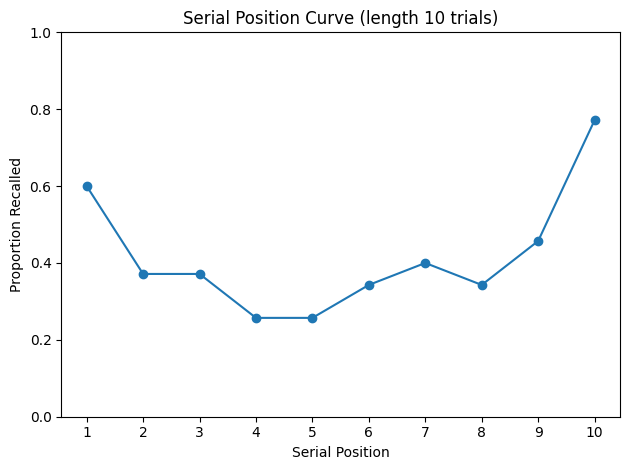


Simple significance checks on length 10 trials:
Primacy vs Middle (k=2): t=1.775, p=0.0849, mean diff=0.157 (n=35 trials)
Recency vs Middle (k=2): t=3.540, p=0.001185, mean diff=0.286 (n=35 trials)


In [33]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ----------------------------
# 1) Load your data
# ----------------------------
data = pd.read_csv("TotalNormal.csv", usecols=["serial", "user_input"]).dropna()

# ----------------------------
# 2) Helpers
# ----------------------------
def parse_items(text):
    """Split '11 22 33' / '11,22;33' into tokens (strings)."""
    if not isinstance(text, str):
        text = str(text)
    toks = re.split(r"[^\w+-]+", text.strip())
    return [t for t in toks if t != ""]

# Build long-form table: one row per (trial, serial position)
rows = []
for tidx, row in data.iterrows():
    serial_list = parse_items(row["serial"])
    recalled = set(parse_items(row["user_input"]))  # order-free membership
    L = len(serial_list)
    for pos, item in enumerate(serial_list, start=1):
        rows.append({
            "trial": tidx,
            "L": L,
            "position": pos,
            "recalled": int(item in recalled),
        })

df = pd.DataFrame(rows)
if df.empty:
    raise ValueError("No usable data — check that 'serial' and 'user_input' contain items.")

# ----------------------------
# 3) Choose a single list length (mode) and plot curve
# ----------------------------
length_counts = df.groupby("trial")["L"].first().value_counts().sort_index()
mode_length = int(length_counts.idxmax())

df_mode = df[df["L"] == mode_length].copy()

# Proportion recalled at each absolute serial position
curve = df_mode.groupby("position")["recalled"].mean()

plt.figure()
plt.plot(curve.index, curve.values, marker="o")
plt.xlabel("Serial Position")
plt.ylabel("Proportion Recalled")
plt.title(f"Serial Position Curve (length {mode_length} trials)")
plt.xticks(range(1, mode_length + 1))
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# ----------------------------
# 4) Simple significance checks (paired across trials)
#    Primacy vs Middle, Recency vs Middle
# ----------------------------
# Define "ends" width (k); 2 is standard for lists >= 6, else use 1
k = 2 if mode_length >= 6 else 1
prim_positions = set(range(1, k + 1))
rec_positions = set(range(mode_length - k + 1, mode_length + 1))

# Trial-wise means over regions
def trial_region_mean(df_long, mask_func):
    vals, ids = [], []
    for t, tdf in df_long.groupby("trial"):
        mask = mask_func(tdf)
        if mask.any():
            vals.append(tdf.loc[mask, "recalled"].mean())
            ids.append(t)
    return pd.Series(vals, index=ids)

primacy = trial_region_mean(df_mode, lambda d: d["position"].isin(prim_positions))
middle  = trial_region_mean(df_mode, lambda d: ~d["position"].isin(prim_positions | rec_positions))
recency = trial_region_mean(df_mode, lambda d: d["position"].isin(rec_positions))

def paired_test(a, b, label_a):
    # Align trials present in both series
    ab = pd.concat([a, b], axis=1, join="inner")
    if ab.shape[0] < 2:
        print(f"[Info] Not enough paired trials for {label_a} vs Middle.")
        return
    t, p = stats.ttest_rel(ab.iloc[:,0], ab.iloc[:,1], nan_policy="omit")
    diff = ab.iloc[:,0].mean() - ab.iloc[:,1].mean()
    print(f"{label_a} vs Middle (k={k}): t={t:.3f}, p={p:.4g}, mean diff={diff:.3f} (n={ab.shape[0]} trials)")

print(f"\nSimple significance checks on length {mode_length} trials:")
paired_test(primacy, middle, "Primacy")
paired_test(recency, middle, "Recency")
